# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 702.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 11.8 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=86ede728a48a68d8da9e54eaf39d6d2d18e7eda4ed3ea9282b0ae0b9be3997fd
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 66.3 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2024.6.2-py3-none-any.whl (164 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 62.7 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.0 which is incompatible.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

For this project, we will be analyzing a movie dataset pulled from Rotten Tomatoes. Rotten Tomatoes is a platform that enables both critics and regular viewers to review and rate movies. We're **mainly** interested in getting to know whether there's a correlation between movies that have the highest rating, and movies that have the max box office (revenue)?

In [2]:
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# import packages
import requests
import base64
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#### **Dataset 1**

Type: CSV file

Method: The data was gathered using an API from Kaggle (https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?select=rotten_tomatoes_movies.csv).

Dataset variables:

 
*   **Variable 1:** id (Unique identifier for each movie)
*   **Variable 2:** title (The title of the movie)
*   **Variable 3:** audienceScore (The average score given by regular viewers)
*   **Variable 4:** tomatoMeter (The percentage of positive reviews from professional critics)
*   **Variable 5:** rating (The movie's age-based classification (e.g., G, PG, PG-13, R))
*   **Variable 6:** ratingContent (Content leading to the rating classification)
*   **Variable 7:** releaseDateTheaters (The date the movie was released in theaters)
*   **Variable 8:** releaseDateStreaming (The date the movie became available for streaming)
*   **Variable 9:** runtimeMinutes (The duration of the movie in minutes)
*   **Variable 10:** genre (The movie's genre(s))
*   **Variable 11:** originalLanguage (The original language of the movie)
*   **Variable 12:** director (The movie's director)
*   **Variable 13:** writer (The writer(s) responsible for the movie's screenplay)
*   **Variable 14:** boxOffice (The movie's total box office revenue)
*   **Variable 15:** distributor (The company responsible for distributing the movie)
*   **Variable 16:** soundMix (The audio format(s) used in the movie)


In [2]:
#1: Preparing URL
base_url = "https://www.kaggle.com/api/v1"
owner_slug = "andrezaza"
dataset_slug = "clapper-massive-rotten-tomatoes-movies-and-reviews"

url = f"{base_url}/datasets/download/{owner_slug}/{dataset_slug}"

#2: Encoding the credentials & preparing the request header
username = "ibtisamz9"
key = "486bd3a9666025622d05d6e5be5e7a8d"
creds = base64.b64encode(bytes(f"{username}:{key}", "ISO-8859-1")).decode("ascii")
headers = {
  "Authorization": f"Basic {creds}"
}

#3: Sending a GET request
response = requests.get(url, headers=headers)

#4: Loading the response via zipfile
zf = zipfile.ZipFile(io.BytesIO(response.content))

#5: Reading the CSV from the zip file and converting it to a dataframe
file_name = "rotten_tomatoes_movies.csv"
movies_df = pd.read_csv(zf.open(file_name))

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23001 non-null   object 
 15  

#### **Dataset 2**

Type: CSV file

Method: The data was gathered by manually downloading from Kaggle (https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?select=rotten_tomatoes_movie_reviews.csv)

Dataset variables:

 
*   **Variable 1:** id (Unique identifier for each movie)
*   **Variable 2:** reviewId (Unique identifier for each critic review)
*   **Variable 3:** creationDate (The date the review was published)
*   **Variable 4:** criticName (The name of the critic who wrote the review)
*   **Variable 5:** isTopCritic (A boolean value indicating if the critic is considered a top critic)
*   **Variable 6:** originalScore (The score provided by the critic)
*   **Variable 7:** reviewState (The status of the review (e.g., fresh, rotten))
*   **Variable 8:** publicationName (The name of the publication where the review was published)
*   **Variable 9:** reviewText (The full text of the critic review)
*   **Variable 10:** scoreSentiment (The sentiment of the critic's score (e.g., positive, negative, neutral))
*   **Variable 11:** reviewUrl (The URL of the original review on Rotten Tomatoes)

In [4]:
reviews_df = pd.read_csv('rotten_tomatoes_movie_reviews.csv')

In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


## 2. Assess data

There are some quality & tidiness issues that have been identified throughout data observation, let's check them out!

First off, let's recall the dimensions/requirements of both data tidiness and quality:


Data tidiness:
* Each variable forms a column
* Each observation forms a row
* Each type of observational unit forms a table

Data quality:
* Completeness
* Validity
* Accuracy
* Consistency
* Uniqueness

### Quality Issue 1: Completeness

Checking for missing values in both dataset:

In [6]:
# Inspecting movies_df visually
movies_df.sample(3)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
138702,the_christmas_tree_1969,The Christmas Tree,82.0,NaN,NaN,NaN,NaN,NaN,110.0,Drama,English,Terence Young,NaN,NaN,NaN,NaN
111089,seven_years_of_night,Seven Years of Night,67.0,NaN,NaN,NaN,2018-04-06,NaN,123.0,Mystery & thriller,Korean,Choo Chang-min,"Choo Chang-min,Jeong You-jeong",$13.2K,CJ Entertainment,NaN
86040,random_hearts,Random Hearts,24.0,15.0,R,"['Language', 'Brief Violence', 'Sexuality']",1999-10-08,2000-02-29,133.0,Drama,English,Sydney Pollack,"Daniel Poniscan,Kurt Luedtke",$31.1M,"Columbia Pictures, Sony Pictures Entertainment","Dolby SR, DTS, Dolby Stereo, Surround, SDDS, D..."


In [7]:
# Inspecting reviews_df visually
reviews_df.sample(3)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
761243,10005047-blue_bird,1455526,2005-11-23,Ken Hanke,False,2.5/5,rotten,"Mountain Xpress (Asheville, NC)",It seems to be a contest over who can deliver ...,NEGATIVE,http://www.mountainx.com/movies/b/thebluebird.php
488692,clerks_2,1527283,2006-07-24,Mark Dujsik,False,3.5/4,fresh,Mark Reviews Movies,A more than worthy display of Smith's ear for ...,POSITIVE,http://www.markreviewsmovies.com/reviews/C/cle...
1312404,gerry,839056,2003-02-04,David Nusair,False,2.5/4,fresh,Reel Film Reviews,...there's no denying that Van Sant has crafte...,POSITIVE,http://reelfilm.com/vansant.htm#gerry


In [8]:
# Inspecting movies_df programmatically
movies_df.isnull().sum()

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64

In [9]:
# Inspecting reviews_df programmatically
reviews_df.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

**Issue and justification:**
> Based on inspecting both visually and programmatically, we can see that we have missing values across many columns in both datasets, some could be useless but others could be handled since they would majorly affect our findings later.

### Quality Issue 2: Validity

**2.1:** We can notice how date is an object and not of a datetime type.

In [10]:
# Inspecting movies_df visually

movies_df['releaseDateTheaters']
movies_df['releaseDateStreaming']

0         2018-08-25
1         2020-02-11
2                NaN
3         2020-10-23
4         2017-03-27
             ...    
143253           NaN
143254           NaN
143255           NaN
143256    2006-11-21
143257           NaN
Name: releaseDateStreaming, Length: 143258, dtype: object

In [11]:
# Inspecting reviews_df visually
reviews_df['creationDate']

0          2003-05-23
1          2007-06-02
2          2019-05-28
3          2019-02-14
4          2018-08-29
              ...    
1444958    2022-07-05
1444959    2022-07-05
1444960    2022-07-05
1444961    2022-07-05
1444962    2022-07-05
Name: creationDate, Length: 1444963, dtype: object

In [12]:
# Inspecting movies_df programmatically
movies_df[['releaseDateStreaming', 'releaseDateTheaters']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   releaseDateStreaming  79420 non-null  object
 1   releaseDateTheaters   30773 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [13]:
# Inspecting reviews_df programmatically
reviews_df['creationDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1444963 entries, 0 to 1444962
Series name: creationDate
Non-Null Count    Dtype 
--------------    ----- 
1444963 non-null  object
dtypes: object(1)
memory usage: 11.0+ MB


____

**2.2:** We see the `box office` values are not numbers but rather a string.

In [14]:
# Inspecting movies_df visually

movies_df['boxOffice'].sample(4)

58403     NaN
75248     NaN
115227    NaN
119637    NaN
Name: boxOffice, dtype: object

In [15]:
# Inspecting movies_df programmatically
movies_df['boxOffice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 143258 entries, 0 to 143257
Series name: boxOffice
Non-Null Count  Dtype 
--------------  ----- 
14743 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


**Issue and justification:**
> After observing data types of our columns, we notice that dates stored in the database comes in formats other than a datetime. It's important to have them as datetime so we can be able to operate further date-logic to them when needed. Additionally, we inspected `boxOffice` values type, as they refer to revenue (numbers) but actually given as strings including signs and letters.

### Tidiness Issue 1: Typo in column name

We noticed a typo in a column name that might affect data interpretation.

In [16]:
# Inspecting reviews_df visually
reviews_df.sample(1)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
973,unstrung_heroes,45082,2000-01-01,James Berardinelli,True,3/4,fresh,ReelViews,NaN,POSITIVE,http://www.reelviews.net/movies/u/unstrung.html


In [17]:
# Inspecting reviews_df programmatically
reviews_df['publicatioName'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1444963 entries, 0 to 1444962
Series name: publicatioName
Non-Null Count    Dtype 
--------------    ----- 
1444963 non-null  object
dtypes: object(1)
memory usage: 11.0+ MB


**Issue and justification:**
> In `reviews_df`, we see a typo in column `publicationName` as `publicatioName`, which affects the meaningfulness of the column name corresponding to its variables.

### Tidiness Issue 2: Misleading column name

Incomprehensible column name.

In [18]:
# Inspecting reviews_df visually
reviews_df.sample(2)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
497536,gimme_the_loot_2012,2139850,2013-04-30,Dave Calhoun,True,3/5,rotten,Time Out,'Gimme the Loot' is ... meandering and a littl...,NEGATIVE,http://www.timeout.com/london/film/gimme-the-loot
207317,sharper,102778768,2023-02-10,Mick LaSalle,True,3/4,fresh,San Francisco Chronicle,"“Sharper” works like a machine, and so it seem...",POSITIVE,https://datebook.sfchronicle.com/movies-tv/jul...


In [19]:
# Inspecting reviews_df programmatically
reviews_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

In [20]:
reviews_df['id']

0                                    beavers
1                                 blood_mask
2          city_hunter_shinjuku_private_eyes
3          city_hunter_shinjuku_private_eyes
4                         dangerous_men_2015
                         ...                
1444958                thor_love_and_thunder
1444959                thor_love_and_thunder
1444960                thor_love_and_thunder
1444961                thor_love_and_thunder
1444962                thor_love_and_thunder
Name: id, Length: 1444963, dtype: object

**Issue and justification:**
> In `reviews_df`, we see the column `"id"` and it's not clear as to what it refers to and could be confused with `review_id`, so we should rename it `"book_id"` to have it actually correspond to the variable (i.e: books).

## 3. Clean data


We will be fixing the data issues mentioned above, and execute some extra clean-up along the way.

In [21]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
cleaned_movies = movies_df.copy()
cleaned_reviews = reviews_df.copy()

### **Quality Issue 1: Completeness**

In [22]:
cleaned_movies.isnull().sum()

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64

In [23]:
cleaned_reviews.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

In [24]:
cleaned_movies.dropna(inplace=True)

In [25]:
cleaned_reviews.dropna(inplace=True)

In [26]:
cleaned_movies.isna().sum()

id                      0
title                   0
audienceScore           0
tomatoMeter             0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
writer                  0
boxOffice               0
distributor             0
soundMix                0
dtype: int64

In [27]:
cleaned_reviews.isna().sum()

id                0
reviewId          0
creationDate      0
criticName        0
isTopCritic       0
originalScore     0
reviewState       0
publicatioName    0
reviewText        0
scoreSentiment    0
reviewUrl         0
dtype: int64

**Issue and justification:**
> We dropped some columns which have over 90% of null values, so they really won't serve us as much. We also dropped all null values to prevent affecting our data findings, and yet we still have a large amount of remaining records.

### **Quality Issue 2: Validity**

#### 2.1:

In [28]:
cleaned_movies['releaseDateStreaming'] = pd.to_datetime(cleaned_movies['releaseDateStreaming'])

In [29]:
cleaned_reviews['creationDate'] = pd.to_datetime(cleaned_reviews['creationDate'])

In [30]:
cleaned_movies['releaseDateStreaming'].info()

<class 'pandas.core.series.Series'>
Index: 3128 entries, 88 to 143250
Series name: releaseDateStreaming
Non-Null Count  Dtype         
--------------  -----         
3128 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 48.9 KB


In [31]:
cleaned_reviews['creationDate'].info()

<class 'pandas.core.series.Series'>
Index: 824198 entries, 0 to 1444962
Series name: creationDate
Non-Null Count   Dtype         
--------------   -----         
824198 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.6 MB


#### 2.2:

Parse $, M and K and convert into integers:

In [32]:
cleaned_movies['boxOffice'] = cleaned_movies['boxOffice'].str.replace("$", "").str.replace(",", "")

In [33]:
cleaned_movies['boxOffice'] = cleaned_movies['boxOffice'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [34]:
cleaned_movies['boxOffice'].info()

<class 'pandas.core.series.Series'>
Index: 3128 entries, 88 to 143250
Series name: boxOffice
Non-Null Count  Dtype
--------------  -----
3128 non-null   int64
dtypes: int64(1)
memory usage: 48.9 KB


**Issue and justification:**
> First we converted all date values into datetime format, to enable any future functions being performed on dates. Additionally, we parsed all signs from `box_office` column values and then converted them into integers so we can work on them later effectively.

### **Tidiness Issue 1: Typo in column name**

In [35]:
cleaned_reviews.rename(columns={'publicatioName': 'publicationName'}, inplace=True)

In [36]:
cleaned_reviews.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicationName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

**Issue and justification:**
> Because we had a wrong column name, we renamed and fixed it into a comprehensible name so it can correctly correspond to variables in the dataset.

### **Tidiness Issue 2: Misleading column name**

In [37]:
cleaned_reviews.rename(columns={'id': 'book_id'}, inplace=True)

In [38]:
cleaned_movies.rename(columns={'id': 'book_id'}, inplace=True)

In [39]:
cleaned_reviews['book_id']

0                                    beavers
1                                 blood_mask
3          city_hunter_shinjuku_private_eyes
5                         dangerous_men_2015
6                         dangerous_men_2015
                         ...                
1444958                thor_love_and_thunder
1444959                thor_love_and_thunder
1444960                thor_love_and_thunder
1444961                thor_love_and_thunder
1444962                thor_love_and_thunder
Name: book_id, Length: 824198, dtype: object

In [40]:
cleaned_movies['book_id']

88             monsoon_wedding
146            robin_hood_2018
151                   my_giant
273       west_side_story_2021
308                 youth_2015
                  ...         
143000             perfect_man
143008        sex_and_the_city
143012            1040484-wind
143025        invisible_circus
143250                fun_size
Name: book_id, Length: 3128, dtype: object

In [41]:
cleaned_reviews.head(2)

,book_id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicationName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...


**Issue and justification:**
> We renamed column "id" to be "book_id" as it can be misleading especially in the reveiws dataset, and one can confuse it with "review_id". We matched both column names in both datasets so we can join them together later.

### **Remove unnecessary variables and combine datasets**


1/ Remove unnecessary variables.

In [42]:
# Remove unnecessary variables and combine datasets
cleaned_movies.drop(columns=['soundMix', 'distributor',
                             'releaseDateTheaters', 'tomatoMeter', 
                             'ratingContents', 'writer'], inplace=True)

In [43]:
# Remove unnecessary variables and combine datasets
cleaned_reviews.drop(columns=['reviewState', 'publicationName',
                              'reviewId', 'isTopCritic' , 'creationDate'], inplace=True)

2/ Rename and convert column names to snake case for better readability.

In [44]:
cleaned_reviews.rename(columns={'originalScore': 'critic_score',
                                'scoreSentiment': 'critic_score_sentiment',
                                'criticName': 'critic_name',
                                'reviewText': 'review_text',
                                'reviewUrl': 'review_url'
                               }, inplace=True)

In [45]:
cleaned_movies.rename(columns={'audienceScore': 'audience_score',
                                'releaseDateStreaming': 'release_date_streaming',
                                'runtimeMinutes': 'duration',
                                'originalLanguage': 'language',
                                'boxOffice': 'box_office' }, inplace=True)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [46]:
# Merge data
merged_df = pd.merge(cleaned_movies, cleaned_reviews, on=['book_id'], how='left')

In [47]:
merged_df.to_csv("movies_cleaned_dataset.csv", index=False, encoding="utf-8")

In [48]:
merged_df.head(2)

,book_id,title,audience_score,rating,release_date_streaming,duration,genre,language,director,box_office,critic_name,critic_score,review_text,critic_score_sentiment,review_url
0,monsoon_wedding,Monsoon Wedding,87.0,R,2002-09-24,100.0,"Comedy, Drama",English,Mira Nair,13900000,Jimmy Cage,9/10,MONSOON WEDDING is a wonderful film in which m...,POSITIVE,https://youtu.be/m8of8Xpd1UA
1,monsoon_wedding,Monsoon Wedding,87.0,R,2002-09-24,100.0,"Comedy, Drama",English,Mira Nair,13900000,Brian Eggert,4/4,A celebration of life that acknowledges how fa...,POSITIVE,https://deepfocusreview.com/reviews/monsoon-we...


## 5. Answer the research question

### **5.1:** Define and answer the research question.

**Research question:** Is there's a correlation between movies that have the highest rating, and movies that have the max box office (revenue)?

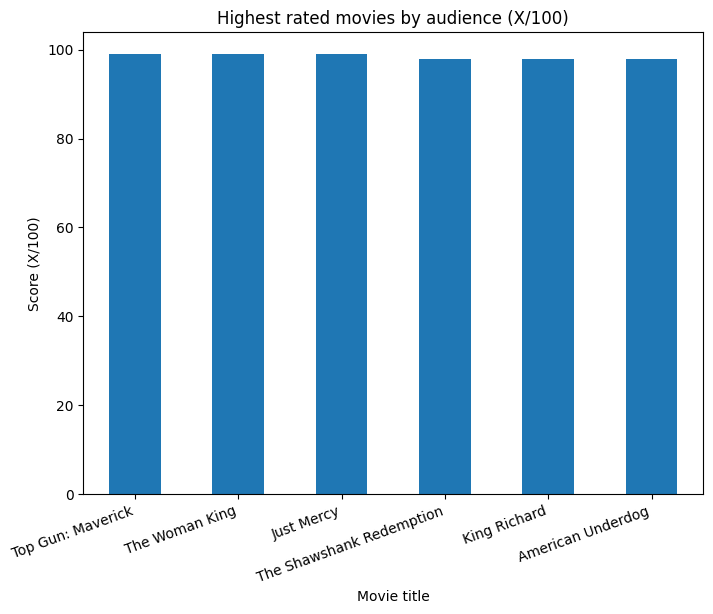

In [49]:
#Visual 1

plt.figure(figsize=(8, 6))

# getting top rated
top_rated = merged_df.groupby('title')['audience_score'].max().sort_values(ascending=False)
highest = top_rated.head(6)

# plotting
highest.plot(kind='bar')
plt.xlabel('Movie title')
plt.ylabel('Score (X/100)')
plt.title('Highest rated movies by audience (X/100)')
plt.xticks(rotation=20, ha='right')
plt.show()

In [50]:
top_rated

title
Top Gun: Maverick           99.0
The Woman King              99.0
Just Mercy                  99.0
The Shawshank Redemption    98.0
King Richard                98.0
                            ... 
Rollerball                  14.0
Simpatico                   14.0
Battlefield Earth           12.0
Alone in the Dark           11.0
House of the Dead           10.0
Name: audience_score, Length: 3091, dtype: float64

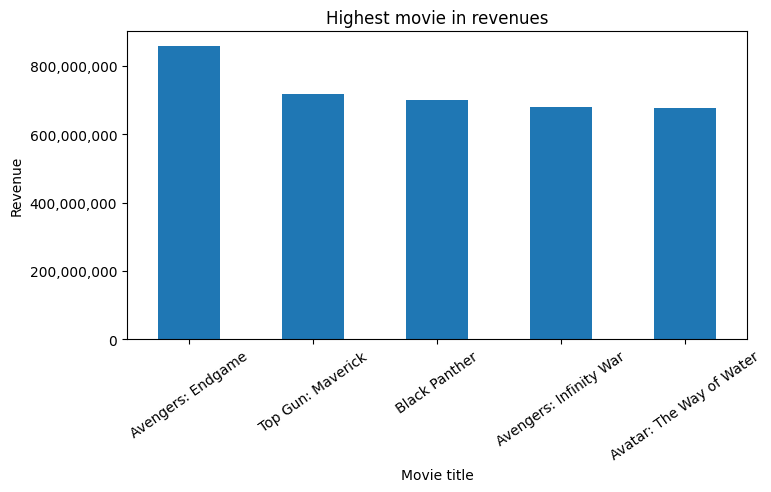

In [51]:
#Visual 2

plt.figure(figsize=(8, 4))

# getting top revenue
top_revenue = merged_df.groupby('title')['box_office'].max().sort_values(ascending=False)
highest = top_revenue.head(5)

# to show full y-axis values
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# plotting
highest.plot(kind='bar')
plt.xlabel('Movie title')
plt.ylabel('Revenue')
plt.title('Highest movie in revenues')
plt.xticks(rotation=35)

plt.show()

In [52]:
top_revenue

title
Avengers: Endgame               858400000
Top Gun: Maverick               718500000
Black Panther                   700200000
Avengers: Infinity War          678800000
Avatar: The Way of Water        678300000
                                  ...    
The Jimmy Show                        703
Pete's Dragon                         555
Star Wars: The Force Awakens          123
The Dark Knight Rises                   2
Mulholland Dr.                          0
Name: box_office, Length: 3091, dtype: int64

**Answer to research question:**
> There seems so be only 1 recurrent movie in both visuals of top 6 movies, which isn't enough to confirm the correlation, but i assume that it could be partially correlated if we go further and explore the top 10 or 20. Some movies of very high rating in Rotten Tomatoes didn't have the best revenue compared to others.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

**Answer:**
> I would go further on assessing the data and investigate all data types and check whether they are in a correct format. I would ask different questions and extract more meaningful findings about the data.

### Resources used that helped me complete this project:

- https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
- https://medium.com/@antonin.puskarcik/how-to-get-kaggle-dataset-through-api-using-python-8ead6a58d68b